In [97]:
import numpy as np
import s323270
from sklearn.model_selection import train_test_split

In [98]:
PROBLEM = 8
SEED = 42
function = eval(f"s323270.f{PROBLEM}")

In [99]:
function

<function s323270.f8(x: numpy.ndarray) -> numpy.ndarray>

In [100]:
x = np.load(f"./data/problem_{PROBLEM}.npz")
print(f"Evaluating problem {PROBLEM}")
x['x'].shape, x['y'].shape

Evaluating problem 8


((6, 50000), (50000,))

In [101]:
dataset_dim = x['x'].shape[0]
dataset_size = x['x'].shape[1]

In [102]:
train_indices, val_indices = train_test_split(range(dataset_size), test_size=0.1, random_state=42)
#train_indices, val_indices = range(0, dataset_size), range(0, dataset_size)
x_train, y_train = x['x'][:, train_indices], x['y'][train_indices]
x_val, y_val = x['x'][:, val_indices], x['y'][val_indices]

In [103]:
print(f"MSE (overall): {100*np.square(x['y']-function(x['x'])).sum()/len(x['y']):g}")

MSE (overall): 1.1711e+08


In [104]:
print(f"MSE (train): {100*np.square(y_train-function(x_train)).sum()/len(y_train):g}")
print(f"MSE (val) : {100*np.square(y_val-function(x_val)).sum()/len(y_val):g}")

MSE (train): 1.17015e+08
MSE (val) : 1.17972e+08


In [105]:
function(x_train)

array([ 1.09146302e+04, -4.13691975e+01, -1.13210878e+04, ...,
        3.66331615e+01,  6.18777841e+03,  5.75678195e+00])

In [106]:
function(x["x"])
x["x"].shape

(6, 50000)

In [107]:
x

NpzFile './data/problem_8.npz' with keys: x, y

C:\Users\HP\AppData\Local\Temp\ipykernel_3816\453437419.py:3: RuntimeWarning: overflow encountered in cosh
  f5 = lambda x: ((-(np.cosh(x[1])) * -0.000) * np.sinh(((((((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + 0.001) * 0.001)) * x[0])))) * x[0]) + 0.001) * x[0]) + (0.001 * -(-(np.cosh(np.sin((((0.001 * ((((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + np.cosh(-0.000)) * (((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + 0.001) * 0.001)) * x[0])))) * x[0]) + 0.001))) * x[1])))) * x[0]) + 0.001) * -0.000)) * -(np.cosh(x[1]))) + (x[1] * np.cosh((((0.001 * (-(np.cosh(x[1])) * np.sin((((0.001 * x[0]) * x[0]) + (((((((0.001 * (-(np.cosh(x[1])) * x[0])) * x[0]) + 0.001) * np.sin((x[0] + np.cosh(np.sin((x[0] + (x[1] * -(np.cosh(x[1]))))))))) + (0.001 * -(-(np.cosh(np.sin((np.sin(-((x[0] * -0.000))) + (x[1] * np.cosh(x[1]))))))))) * (-(np.cosh(np.sin(-(((-(np.cosh(x[1])) * x[0]) * -0.000))))) * -0.000)) * (0.001 * -(0.001))))))) * x[0]) + (x[1] * x[1]))))))))

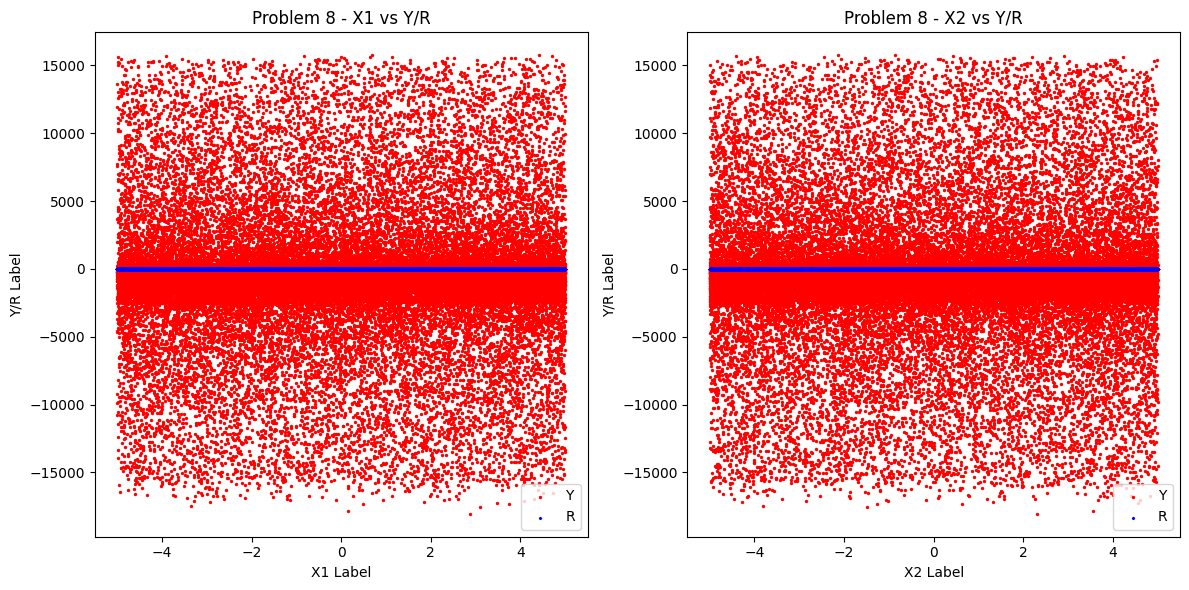

In [108]:
f = x['x']
f5 = lambda f: (-((-0.001 * f[1])) * np.sinh(((((0.001 * -(f[0])) * f[0]) + 0.001) * (-(np.cosh(np.sin((-(np.cosh(f[1])) * 0.001)))) * -0.000))))
f5 = lambda x: ((-(np.cosh(x[1])) * -0.000) * np.sinh(((((((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + 0.001) * 0.001)) * x[0])))) * x[0]) + 0.001) * x[0]) + (0.001 * -(-(np.cosh(np.sin((((0.001 * ((((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + np.cosh(-0.000)) * (((0.001 * -(np.cosh((np.sinh((((-(np.cosh(x[1])) * x[0]) + 0.001) * 0.001)) * x[0])))) * x[0]) + 0.001))) * x[1])))) * x[0]) + 0.001) * -0.000)) * -(np.cosh(x[1]))) + (x[1] * np.cosh((((0.001 * (-(np.cosh(x[1])) * np.sin((((0.001 * x[0]) * x[0]) + (((((((0.001 * (-(np.cosh(x[1])) * x[0])) * x[0]) + 0.001) * np.sin((x[0] + np.cosh(np.sin((x[0] + (x[1] * -(np.cosh(x[1]))))))))) + (0.001 * -(-(np.cosh(np.sin((np.sin(-((x[0] * -0.000))) + (x[1] * np.cosh(x[1]))))))))) * (-(np.cosh(np.sin(-(((-(np.cosh(x[1])) * x[0]) * -0.000))))) * -0.000)) * (0.001 * -(0.001))))))) * x[0]) + (x[1] * x[1]))))))))))) * (-(np.cosh(np.sin(-((-(np.cosh(x[1])) * -0.000))))) * -0.000))))
import matplotlib.pyplot as plt

r = f5(f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: X1 vs Y and X1 vs R
scatter1 = ax1.scatter(f[0], x['y'], marker='o', s=2, color="r", label='Y')
scatter1_r = ax1.scatter(f[0], r, marker='x', s=2, color="b", label='R')
ax1.set_xlabel('X1 Label')
ax1.set_ylabel('Y/R Label')
ax1.set_title(f"Problem {PROBLEM} - X1 vs Y/R")
ax1.legend()

# Second subplot: X2 vs Y and X2 vs R
scatter2 = ax2.scatter(f[1], x['y'], marker='o', s=2, color='r', label='Y')
scatter2_r = ax2.scatter(f[1], r, marker='x', s=2, color='b', label='R')
ax2.set_xlabel('X2 Label')
ax2.set_ylabel('Y/R Label')
ax2.set_title(f"Problem {PROBLEM} - X2 vs Y/R")
ax2.legend()

plt.tight_layout()
plt.show()